# Week 05 - Lab Exercises: Regression and Classification

This week's exercises use the following datasets:

- adult data
- iris data
- wine quality data

Please ensure you have these datasets available. The were included in week 04's lab exercise package.

Before working on this lab exercises, you should first walk through the Week 05 Examples notebook.


# Preparation

Please ensure all the required packages and data set are imported before proceeding to the tasks.

In [1]:
#import required packages in this cell
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#import data in this cell
adult_data = pd.read_csv(r'C:\Users\Waqas\bdadata\adult\adult_full.data')
iris_data = pd.read_csv(r'C:\Users\Waqas\bdadata\iris\iris.data')
wine_quality_white = pd.read_csv(r'C:\Users\Waqas\bdadata\wine-quality\winequality-white.csv', delimiter=';')
wine_quality_red = pd.read_csv(r'C:\Users\Waqas\bdadata\wine-quality\winequality-red.csv', delimiter=';')

## Task 1: Adult Data - Sex and Salary

Based on the following code from Example 3, calculate the Chi square of sex/salary using a set of modified expected values.

The modified expected values should be based on the assumption:
- Male and Female should each be 50% of the population
- The percentage of <=50K is 70% and >50K is 30%

How does the Chi square value change compared to the one in Example 3?

The Chi square value is much larger than in Ex3, almost 3x as large.

In [3]:
#import chisquare from the stats library from scipy
from scipy.stats import chisquare

fd = pd.crosstab(adult_data.loc[:,'sex'],adult_data.loc[:,'salary'])

#TODO: Compute the expected values based on the assumption male/female is 50%/50%, and <=50K/>50K is 70%/30%

# M, <=50K = 0.5*0.7*48842 = 17094.7
# M, >50K = 0.5*0.3*48842 = 7326.3
# F, <=50K = 0.5*0.7*48842 = 17094.7
# F, >50K = 0.5*0.3*48842 = 7326.3

#The expected values are calculated based on the formula in the lecture slide
expected = np.array([[17094.7,7326.3],[17094.7,7326.3]])

#N.B. we used flatten here so that the chisquare method treats the entire cross table as one data series
# By default, chisquare treats each column as a series
stats, p = chisquare(fd.to_numpy().flatten(), f_exp=expected.flatten(), ddof=1)

print('Chi square is', stats, 'p-value is', p)

Chi square is 7408.823432603866 p-value is 0.0


## Task 2: Iris Data - Error Evaluation of Multiple Regression

Using the multiple linear regression example from Example 2 as the basis, calculate the Sum Square Error, Mean Square Error and Root Mean Square Error.

In [4]:
#import the linear_model library from sklearn
from sklearn import linear_model

linreg = linear_model.LinearRegression()

#Multiple regression: (sepal length, sepal width, pedal length) -> pedal width
linreg.fit(iris_data.loc[:,['sepal_length','sepal_width','pedal_length']], iris_data.pedal_width)

print('The coefficient is ', linreg.coef_)

#Predict pedal width from 'sepal length', 'sepal width' and 'pedal length'
predicted_width = linreg.predict(iris_data.loc[:,['sepal_length','sepal_width','pedal_length']])

#TODO: Calculate the SSE, MSE and RMSE of this linear regression

#calculate the sum square error (SSE), mean square error (MSE) and the root mean square error (RMS)
sse = np.sum(np.square(predicted_width - iris_data.pedal_width))
mse = np.mean(np.square(predicted_width - iris_data.pedal_width))
rms = np.sqrt(mse)

print('SSE=', sse, 'MSE=', mse, 'RMS=', rms)

The coefficient is  [-0.21027133  0.22877721  0.52608818]
SSE= 5.376166371766756 MSE= 0.0358411091451117 RMS= 0.18931748240749374


## Task 3: Iris Data - Evaluate K-Means Classification Accuracy

The code fragment below uses the K-means method to create 3 clusters of the iris data.

You task here is to evaluate its accuracy in classifying the three species of iris data, setosa, virginica and versicolor.

You may simply present the accuracy in percentage, e.g. setosa 95% means 95% of the setoas are correctly classified.

In [5]:
#import kmeans from the cluster library from sklearn
#import classification_report from the metrics library from sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

#create a new dataframe populated by the 0-4th columns of iris_data
iris_features = iris_data.iloc[:,0:4]

#create a kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
#fit the kmeans model with the iris_features dataframe
kmeans.fit(iris_features)

#assign the predicted (from kmeans) and actual labels
#replace the iris species names with a numerical key
y_pred = kmeans.labels_
y_true = iris_data.iloc[:,4].replace({'Iris-versicolor': 0, 'Iris-setosa':1, 'Iris-virginica': 2})

print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        62
           1       1.00      1.00      1.00        50
           2       0.72      0.95      0.82        38

    accuracy                           0.89       150
   macro avg       0.89      0.91      0.89       150
weighted avg       0.91      0.89      0.89       150



## Task 4: Wine Quality Data - Regression and Classification

### Task 4a: Examine variable dependencies

Use Pearson's linear correlation to examine all pair-wise variable dependencies of the wine quality data.

In [6]:
#add a 'type' column to both white and red datasets, populate with respective type
wine_quality_white["type"] = 'white'
wine_quality_red["type"] = 'red'

#merge the wine_quality_white and wine_quality_red datasets into a singular dataset
frames = [wine_quality_white, wine_quality_red]
wine_quality = pd.concat(frames)

In [7]:
#print Pearson's linear correlation
wine_quality.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


### Task 4b: Apply Linear regression

From the results of task 4a, 

- select a pair of variables that have strong correlation, i.e. absolute value greater than 0.7, and use linear regression to model their relationship. 
- select a pair of variables that have weak correlation, i.e. absolute value less than 0.5, and use linear regression to model their relationship

Additionally, use visualisation to show the result of the linear regression and its RMS error bounds.

Text(0, 0.5, 'total sulfur dioxide')

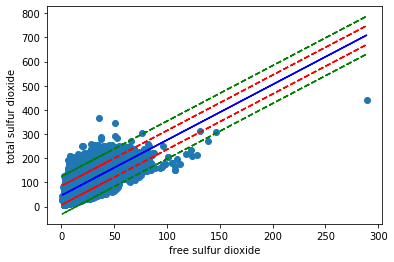

In [8]:
#Strong variable pair in this cell

#selected variables: ['free sulphur dioxide'] and ['total sulphur dioxide'] : abs(correlation) = 0.720934

#import the linear_model library from sklearn
from sklearn import linear_model

#create a new linear regression model
linreg = linear_model.LinearRegression()
#fit the model with the selected variables and predict the second variable
linreg.fit(wine_quality.iloc[:,5].to_numpy().reshape(-1,1), wine_quality.iloc[:,6])
predicted_tsd = linreg.predict(wine_quality.iloc[:,5].to_numpy().reshape(-1,1))

#calculate the sum square error (SSE), mean square error (MSE) and the root mean square error (RMS)
sse = np.sum(np.square(predicted_tsd - wine_quality.iloc[:,6]))
mse = np.mean(np.square(predicted_tsd - wine_quality.iloc[:,6]))
rms = np.sqrt(mse)

#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
axis = fig.add_subplot(111)

#plot variable 1 by variable 2
axis.scatter(wine_quality.iloc[:,5], wine_quality.iloc[:,6])
#plot variable 1 by predicted variable 2
axis.plot(wine_quality.iloc[:,5], predicted_tsd, color='b')

#Visualise the bounds of one RMS
axis.plot(wine_quality.iloc[:,5], predicted_tsd+rms, '--', color='r')
axis.plot(wine_quality.iloc[:,5], predicted_tsd-rms, '--', color='r')

#Visualise the bounds of two RMS
axis.plot(wine_quality.iloc[:,5], predicted_tsd+rms*2.0, '--', color='g')
axis.plot(wine_quality.iloc[:,5], predicted_tsd-rms*2.0, '--', color='g')

#set the labels for the x and y axes
axis.set_xlabel('free sulfur dioxide')
axis.set_ylabel('total sulfur dioxide')

Text(0, 0.5, 'citricacid')

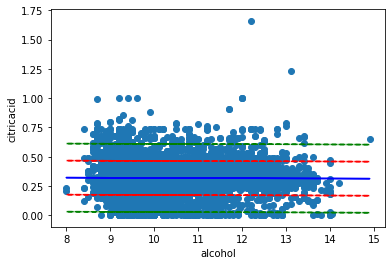

In [9]:
#Weak variable pair in this cell

#selected variables: ['alcohol'] and ['citric acid'] : abs(correlation) = 0.010493

#import the linear_model library from sklearn
from sklearn import linear_model

#create a new linear regression model
linreg = linear_model.LinearRegression()
#fit the model with the selected variables and predict the second variable
linreg.fit(wine_quality.iloc[:,10].to_numpy().reshape(-1,1), wine_quality.iloc[:,2])
predicted_citricacid = linreg.predict(wine_quality.iloc[:,10].to_numpy().reshape(-1,1))

#calculate the sum square error (SSE), mean square error (MSE) and the root mean square error (RMS)
sse = np.sum(np.square(predicted_citricacid - wine_quality.iloc[:,2]))
mse = np.mean(np.square(predicted_citricacid - wine_quality.iloc[:,2]))
rms = np.sqrt(mse)

#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
axis = fig.add_subplot(111)

#plot variable 1 by variable 2
axis.scatter(wine_quality.iloc[:,10], wine_quality.iloc[:,2])
#plot variable 1 by predicted variable 2
axis.plot(wine_quality.iloc[:,10], predicted_citricacid, color='b')

#Visualise the bounds of one RMS
axis.plot(wine_quality.iloc[:,10], predicted_citricacid+rms, '--', color='r')
axis.plot(wine_quality.iloc[:,10], predicted_citricacid-rms, '--', color='r')

#Visualise the bounds of two RMS
axis.plot(wine_quality.iloc[:,10], predicted_citricacid+rms*2.0, '--', color='g')
axis.plot(wine_quality.iloc[:,10], predicted_citricacid-rms*2.0, '--', color='g')

#set the labels for the x and y axes
axis.set_xlabel('alcohol')
axis.set_ylabel('citricacid')

### Task 4c: Apply logistic regression

Use logistic regression to classify the wine data into red and white, and show the accuracy of the classifier. Please, note you can select any combination of attributes as input features. You may also keep experimenting with different feature sets as input to see their effect on the classification accuracy.

In [10]:
#import LogisticRegression from the linear_model library from sklearn
from sklearn.linear_model import LogisticRegression

#set the type column as category type to convert into integer later
wine_quality['typeid'] = wine_quality.type.astype('category')

#convert the selected attributes from wine_quality into a numpy array
features = wine_quality.loc[:,['residual sugar','free sulfur dioxide', 'total sulfur dioxide']].to_numpy()
#retrieve the integer values of the type labels
labels = wine_quality.typeid.cat.codes

#create a logistic regression instance using the lbfgs solver
classifier = LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto')
#train the classifier
classifier.fit(features, labels)
#print the accuracy score
print("Logistic Regression Classifier Accuracy:",classifier.score(features, labels))

Logistic Regression Classifier Accuracy: 0.9281206710789596


### Task 4d: Apply K-means clustering

Use the K-means method to create clusters from the wine data based on the quality atribute. Similar to Task 4c, you may use all or subset of attributes as input features.

Show the visualisation of K-means using Scatter plot (if no. of features is 3 or fewer), parallel-coordiantes (if no. of features is 4 or greater) 

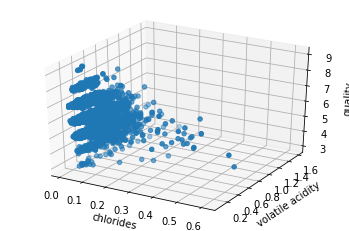

In [11]:
#import kmeans from the cluster library from sklearn
from sklearn.cluster import KMeans

#set the quality column as category type to convert into integer later
wine_quality['qualityid'] = wine_quality.quality.astype('category')

#convert the selected attributes from wine_quality into a numpy array
features = wine_quality.loc[:,['chlorides','volatile acidity']].to_numpy()
#retrieve the integer values of the quality labels
labels = wine_quality.qualityid.cat.codes

#create a kmeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
#fit the kmeans model with the features and labels
kmeans.fit(features, labels)

#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
#projection='3d' dentoes the axis created will be for 3D plotting
axis = fig.add_subplot(111, projection='3d')

#set the labels for the x,y and z axes
axis.set_xlabel('chlorides')
axis.set_ylabel('volatile acidity')
axis.set_zlabel('quality')

#create and show a 3D scatter plot on the axis for the selected attributes of the wine_quality data
axis.scatter(wine_quality.chlorides, wine_quality['volatile acidity'], wine_quality.quality)
plt.show()